In [1]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

In [4]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX.data

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [7]:
# Create an operator from a QuantumCircuit object
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

# Convert circuit to an operator by implicit unitary simulation
Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

# using operator in circuts

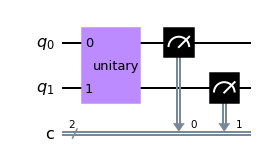

In [8]:
# Create an operator
XX = Operator(Pauli(label='XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
circ.draw('mpl')

In [18]:
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [29]:
backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circ, QasmSimulator(), basis_gates=['u1','u2','u3','cx'])
print('counts = ',job.result().get_counts(0))

counts =  {'1': 475, '0': 549}


In [30]:
qobj = job.qobj()
qobj.experiments[0].instructions

[QasmQobjInstruction(name='u2', params=[0.7853981633974483, -2.7755575615628914e-16], qubits=[0]),
 QasmQobjInstruction(name='measure', qubits=[0], memory=[0])]

In [12]:
import qiskit
from qiskit import *
from qiskit.providers.aer import *

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circ = QuantumCircuit(qr, cr)
circ.h(qr[0])
circ.x(qr[0])
circ.t(qr[0])
circ.measure(qr, cr)
job = qiskit.execute(circ, QasmSimulator(), basis_gates=['u3', 'cx'])
qobj = job.qobj()
qobj.experiments[0].instructions

[QasmQobjInstruction(name='u3', params=[1.5707963267948966, 0.7853981633974483, -2.220446049250313e-16], qubits=[0]),
 QasmQobjInstruction(name='measure', qubits=[0], memory=[0])]